
# Real Estate Price Prediction

## 1. Introduction
This project analyzes real estate data to predict median house prices (MEDV). We clean the data, engineer features, visualize correlations, and apply machine learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.shape

(506, 14)

## 2. Data Exploration
Checking dataset information, missing values, and summary statistics.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CRIM (Crime Rate)                           506 non-null    float64
 1   ZN (Large Residential Zone)                 506 non-null    float64
 2   INDUS (Industrial Land Percentage)          506 non-null    float64
 3   CHAS (Near Charles River)                   506 non-null    int64  
 4   NOX (Air Pollution Level)                   506 non-null    float64
 5   RM (Number of Rooms)                        501 non-null    float64
 6   AGE (Old Houses Percentage)                 506 non-null    float64
 7   DIS (Distance to Jobs)                      506 non-null    float64
 8   RAD (Highway Access)                        506 non-null    int64  
 9   TAX (Property Tax Rate)                     506 non-null    int64  
 10  PTRATIO (Stude

# Visualizing missing values

In [5]:
df['RM (Number of Rooms)'].isnull().sum()

np.int64(5)

# Handling missing values

In [6]:
df['RM (Number of Rooms)'].dropna()

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM (Number of Rooms), Length: 501, dtype: float64

In [7]:
df.dropna(inplace=True)
df=df.reset_index(drop=True)

In [8]:
df.head()

,CRIM (Crime Rate),ZN (Large Residential Zone),INDUS (Industrial Land Percentage),CHAS (Near Charles River),NOX (Air Pollution Level),RM (Number of Rooms),AGE (Old Houses Percentage),DIS (Distance to Jobs),RAD (Highway Access),TAX (Property Tax Rate),PTRATIO (Student-Teacher Ratio),B (Racial Composition Factor),LSTAT (Lower Income Population Percentage),MEDV (Median House Price)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:

df.describe()

,CRIM (Crime Rate),ZN (Large Residential Zone),INDUS (Industrial Land Percentage),CHAS (Near Charles River),NOX (Air Pollution Level),RM (Number of Rooms),AGE (Old Houses Percentage),DIS (Distance to Jobs),RAD (Highway Access),TAX (Property Tax Rate),PTRATIO (Student-Teacher Ratio),B (Racial Composition Factor),LSTAT (Lower Income Population Percentage),MEDV (Median House Price)
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Visualization

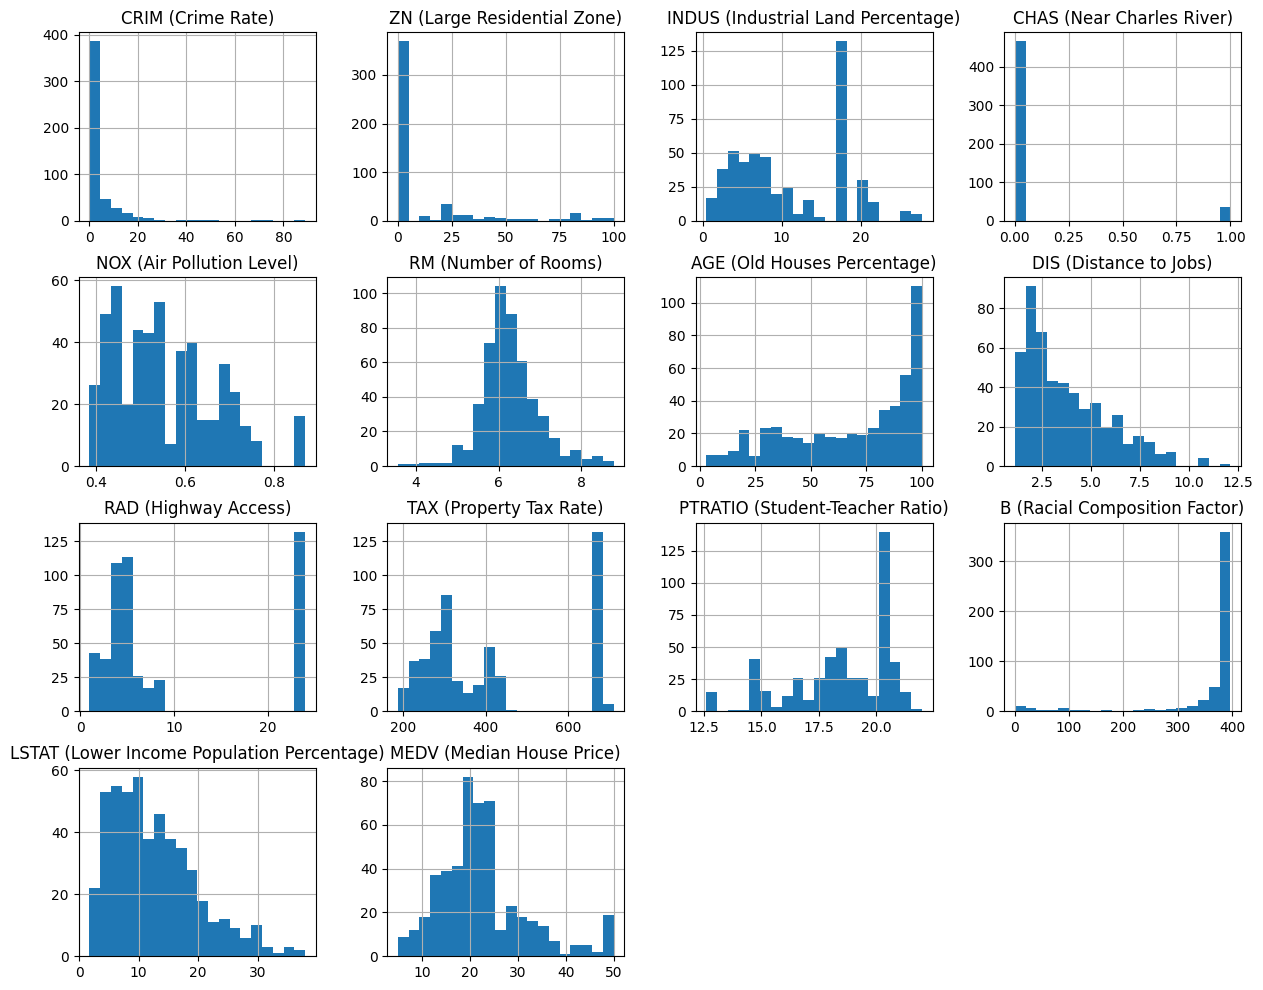

In [10]:
df.hist(bins=20,figsize=(15,12))
plt.show()

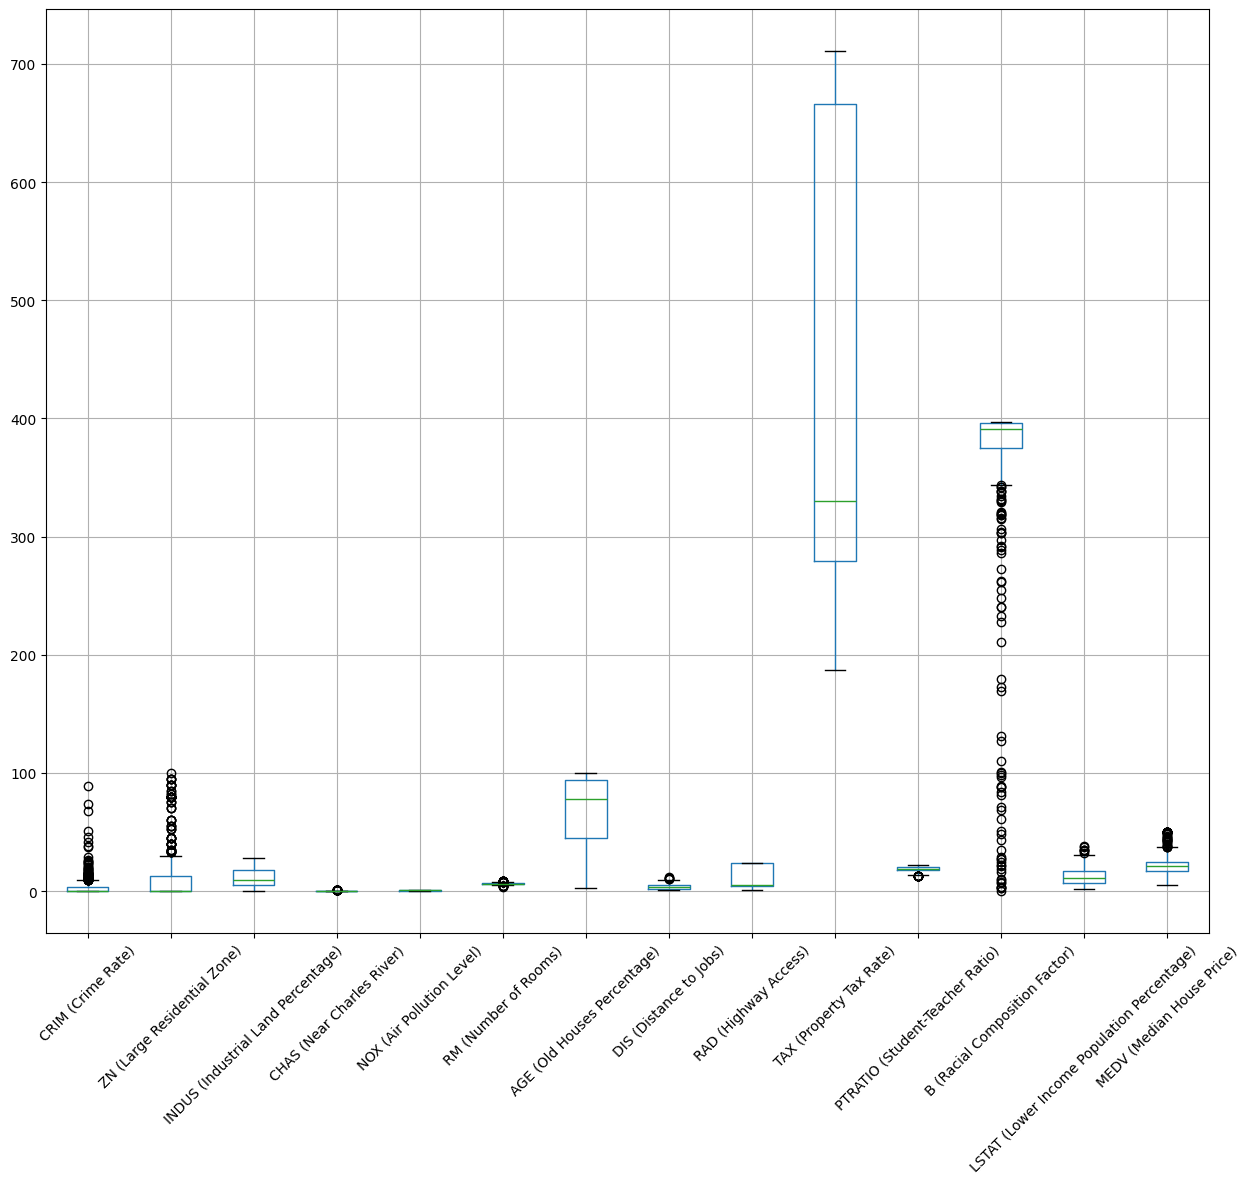

In [11]:
df.boxplot(figsize=(15,12))
plt.xticks(rotation=45)
plt.show()

In [12]:
df[df['PTRATIO (Student-Teacher Ratio)']>=15]

,CRIM (Crime Rate),ZN (Large Residential Zone),INDUS (Industrial Land Percentage),CHAS (Near Charles River),NOX (Air Pollution Level),RM (Number of Rooms),AGE (Old Houses Percentage),DIS (Distance to Jobs),RAD (Highway Access),TAX (Property Tax Rate),PTRATIO (Student-Teacher Ratio),B (Racial Composition Factor),LSTAT (Lower Income Population Percentage),MEDV (Median House Price)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
497,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
498,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
499,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 3. Feature Engineering

In [13]:
df["TAXRM (TAX ON PER ROOM)"]=df['TAX (Property Tax Rate)']/df['RM (Number of Rooms)']

In [14]:
col=list(df.columns)
df=df[col[0:10]+[col[-1]]+col[10:-1]]


## 4. Data Splitting
Splitting data into training and test sets.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in shuffle.split(df,df['CHAS (Near Charles River)']):
    train_set=df.loc[train_index]
    test_set=df.loc[test_index]

In [16]:
train_set.shape

(400, 15)

In [17]:
test_set["CHAS (Near Charles River)"].value_counts()

CHAS (Near Charles River)
0    94
1     7
Name: count, dtype: int64

In [18]:
train_set["CHAS (Near Charles River)"].value_counts()

CHAS (Near Charles River)
0    372
1     28
Name: count, dtype: int64

In [19]:
df=train_set.copy()

In [20]:
corr_matrix = df.corr()
corr_matrix['MEDV (Median House Price)'].sort_values(ascending=False)

MEDV (Median House Price)                     1.000000
RM (Number of Rooms)                          0.694954
ZN (Large Residential Zone)                   0.346669
B (Racial Composition Factor)                 0.343755
DIS (Distance to Jobs)                        0.240783
CHAS (Near Charles River)                     0.216380
AGE (Old Houses Percentage)                  -0.347895
RAD (Highway Access)                         -0.359789
CRIM (Crime Rate)                            -0.374047
NOX (Air Pollution Level)                    -0.423198
TAX (Property Tax Rate)                      -0.445115
PTRATIO (Student-Teacher Ratio)              -0.469000
INDUS (Industrial Land Percentage)           -0.470251
TAXRM (TAX ON PER ROOM)                      -0.531052
LSTAT (Lower Income Population Percentage)   -0.733719
Name: MEDV (Median House Price), dtype: float64

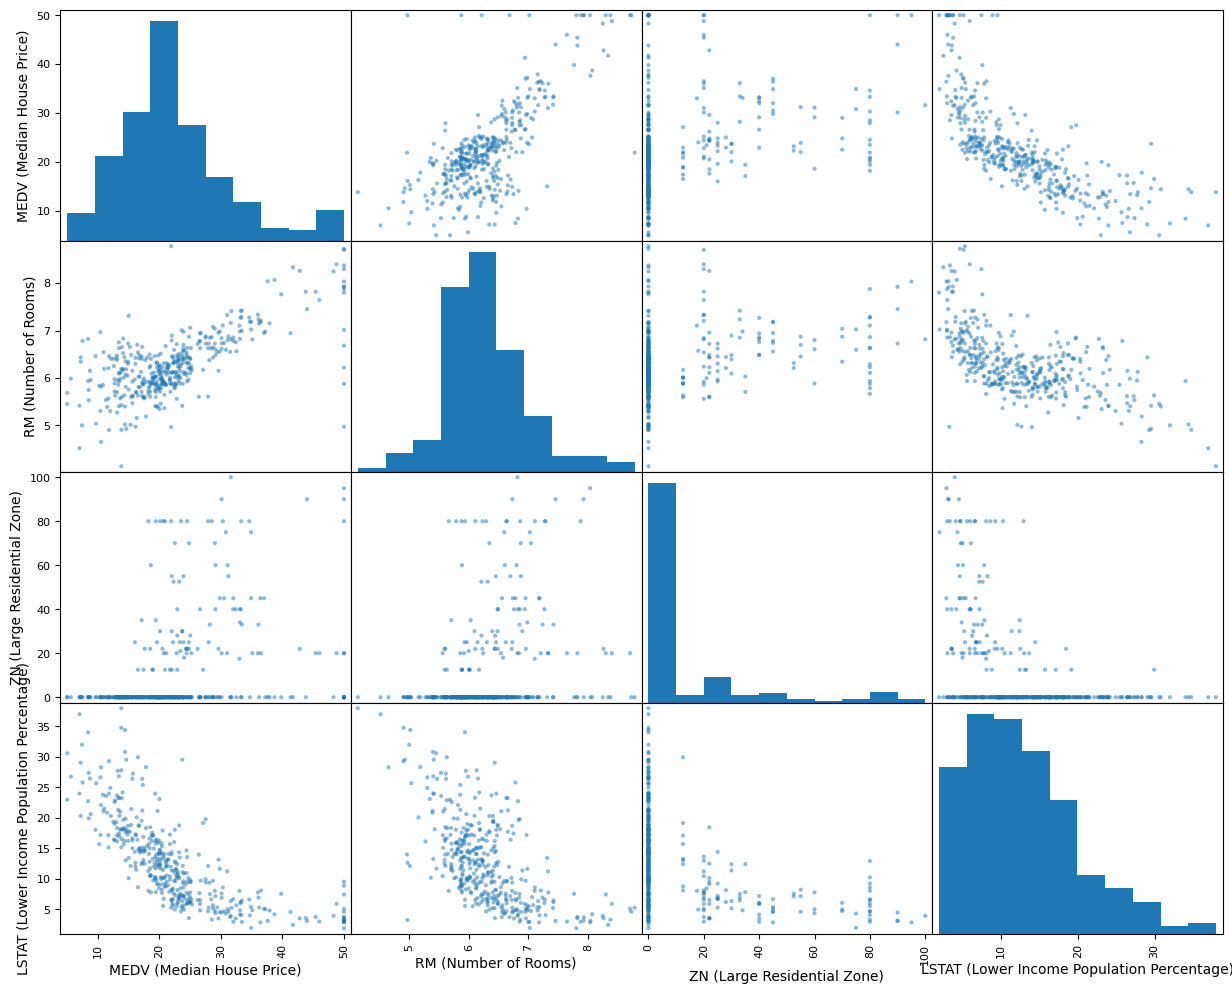

In [21]:
from pandas.plotting import scatter_matrix
attribute=df[["MEDV (Median House Price)","RM (Number of Rooms)","ZN (Large Residential Zone)","LSTAT (Lower Income Population Percentage)"]]
scatter_matrix(attribute, figsize=(15, 12))
plt.show()

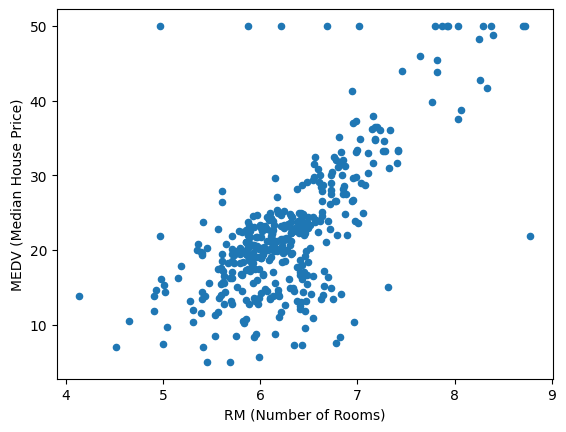

In [22]:
df.plot(kind='scatter',x='RM (Number of Rooms)',y='MEDV (Median House Price)')
plt.show()

In [23]:
df.head()

,CRIM (Crime Rate),ZN (Large Residential Zone),INDUS (Industrial Land Percentage),CHAS (Near Charles River),NOX (Air Pollution Level),RM (Number of Rooms),AGE (Old Houses Percentage),DIS (Distance to Jobs),RAD (Highway Access),TAX (Property Tax Rate),TAXRM (TAX ON PER ROOM),PTRATIO (Student-Teacher Ratio),B (Racial Composition Factor),LSTAT (Lower Income Population Percentage),MEDV (Median House Price)
15,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,51.727043,21.0,386.85,6.58,23.1
302,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,32.413491,18.4,396.90,7.53,28.2
123,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,76.760934,21.2,392.11,17.19,16.2
220,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,35.186246,17.4,382.00,4.63,50.0
469,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666,122.719735,20.2,352.58,18.14,13.8


In [24]:
correlation=df.corr()
correlation['MEDV (Median House Price)'].sort_values(ascending=False)

MEDV (Median House Price)                     1.000000
RM (Number of Rooms)                          0.694954
ZN (Large Residential Zone)                   0.346669
B (Racial Composition Factor)                 0.343755
DIS (Distance to Jobs)                        0.240783
CHAS (Near Charles River)                     0.216380
AGE (Old Houses Percentage)                  -0.347895
RAD (Highway Access)                         -0.359789
CRIM (Crime Rate)                            -0.374047
NOX (Air Pollution Level)                    -0.423198
TAX (Property Tax Rate)                      -0.445115
PTRATIO (Student-Teacher Ratio)              -0.469000
INDUS (Industrial Land Percentage)           -0.470251
TAXRM (TAX ON PER ROOM)                      -0.531052
LSTAT (Lower Income Population Percentage)   -0.733719
Name: MEDV (Median House Price), dtype: float64

<Axes: xlabel='TAXRM (TAX ON PER ROOM)', ylabel='MEDV (Median House Price)'>

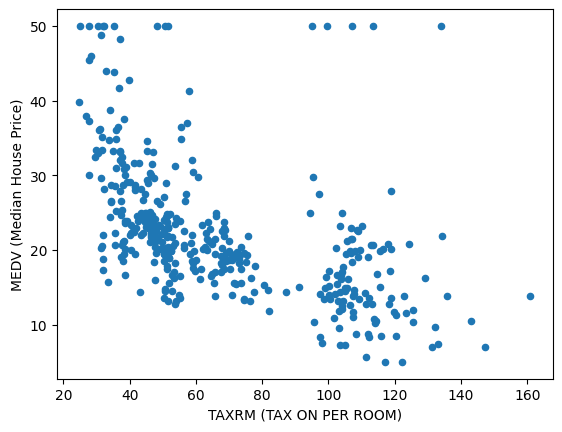

In [25]:
df.plot(x='TAXRM (TAX ON PER ROOM)',y='MEDV (Median House Price)',kind='scatter')

In [26]:
future=df.iloc[:,:-1]
label=df.iloc[:,-1:]

# future = df.drop(columns=['MEDV (Median House Price)'])
# label = df['MEDV (Median House Price)']


## 5. Data Preprocessing
Scaling features using pipelines.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ('imuter',SimpleImputer(strategy="median")),
    ("std_scaler",StandardScaler())
])

df_tr=my_pipeline.fit_transform(future)
df_tr.shape

(400, 14)

## 6. Model Training and Evaluation
Training Linear Regression, Decision Tree, and Random Forest models.

# (a) Linear Regration

In [28]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(df_tr,label)
predict=linear.predict(df_tr)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score


In [30]:
mse=mean_squared_error(label,predict)
rmse=np.sqrt(mse)
r2=r2_score(label,predict)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 16.85
RMSE: 4.10
R² Score: 0.80


## 7. Cross-Validation
cross-validation for a more reliable evaluation.

In [31]:
score=cross_val_score(linear,df_tr,label,scoring="neg_mean_squared_error",cv=10)

In [32]:
mse=-score.mean()
rmse=np.sqrt(mse)
r2=r2_score(label,predict)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 18.97
RMSE: 4.36
R² Score: 0.80


# (b) Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [34]:
random_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1), 
    'min_samples_leaf': np.arange(1, 20, 1),
    'max_features': ['auto', 'sqrt', 'log2', None],
}


# Use RandomizedSearchCV for hyperparameter tuning in decision tree

In [35]:
decision_tree = DecisionTreeRegressor()

random_search = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=random_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [36]:
random_search.fit(df_tr, label)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Use

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
print("Best_parameter = ",random_search.best_params_)
print("best_score = ",random_search.best_score_)

Best_parameter =  {'splitter': 'random', 'min_samples_split': np.int64(3), 'min_samples_leaf': np.int64(4), 'max_features': None, 'max_depth': np.int64(14), 'criterion': 'absolute_error'}
best_score =  -22.248262500000003


In [38]:
predict=random_search.predict(df_tr)
mse=mean_squared_error(label,predict)
rmse=np.sqrt(mse)
r2=r2_score(label,predict)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 21.66
RMSE: 4.65
R² Score: 0.74


# (c) RandomForest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)


In [40]:
parameter={
    'n_estimators': [10,20,30,40,50,60,70],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_features': [0.5,0.75,1.0],
    'bootstrap': [False,True],
    'max_samples': [0.25,0.5,0.75],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    }

# Using GridSearchCV to better hyperparameter tuning

In [41]:
rf_cv=GridSearchCV(rf,param_grid=parameter,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)

In [42]:
rf_cv.fit(df_tr,label)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
18900 fits failed out of a total of 37800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Asus\A

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': [0.5, 0.75, 1.0],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70]},
             scoring='neg_mean_squared_error')

In [43]:
print("Best_parameter = ",rf_cv.best_params_)
print("best_score = ",rf_cv.best_score_)

Best_parameter =  {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 11, 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 60}
best_score =  -11.361494041666663


In [44]:
predict=rf_cv.predict(df_tr)
mse=mean_squared_error(label,predict)
rmse=np.sqrt(mse)
r2=r2_score(label,predict)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 2.96
RMSE: 1.72
R² Score: 0.96


In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada_boos=AdaBoostRegressor(random_state=42)

In [46]:
parameter={
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500],
    'learning_rate': [0.0001,0.001,0.01,0.1,1.0],
    'loss':['linear', 'square', 'exponential']
}

# Using GridSearchCV to better hyperparameter tuning

In [48]:
ada_cv=GridSearchCV(ada_boos,param_grid=parameter,scoring="neg_mean_squared_error",cv=5,n_jobs=-1)

In [49]:
ada_cv.fit(df_tr,label)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 150, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [50]:
print("best parameters = ",ada_cv.best_params_)
print("best score = ",ada_cv.best_score_)

best parameters =  {'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 20}
best score =  -13.23364450241363


In [51]:
predict=ada_cv.predict(df_tr)
mse=mean_squared_error(label,predict)
rmse=np.sqrt(mse)
r2=r2_score(label,predict)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 8.62
RMSE: 2.94
R² Score: 0.90


In [ ]:
# ls(liner regression) = MSE: 16.85    RMSE: 4.10      R² Score: 0.80
# dt(decision tree)    = MSE: 11.18    RMSE: 3.34      R² Score: 0.87
# rf (random forest)   = MSE: 2.78     RMSE: 1.67      R² Score: 0.97
# ada_boss (ada boost) = MSE: 8.62     RMSE: 2.94      R² Score: 0.90

In [55]:
data = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "AdaBoost"],
    "MSE": [16.85, 11.18, 2.78, 8.62],
    "RMSE": [4.10, 3.34, 1.67, 2.94],
    "R2 Score": [0.80, 0.87, 0.97, 0.90]
}
results_df = pd.DataFrame(data)
results_df = results_df.sort_values(by=["MSE", "RMSE", "R2 Score"], ascending=[True, True, False])
print(results_df)
best_model = results_df.iloc[0]
print("\nBest Model:")
print(best_model)


               Model    MSE  RMSE  R2 Score
2      Random Forest   2.78  1.67      0.97
3           AdaBoost   8.62  2.94      0.90
1      Decision Tree  11.18  3.34      0.87
0  Linear Regression  16.85  4.10      0.80

Best Model:
Model       Random Forest
MSE                  2.78
RMSE                 1.67
R2 Score             0.97
Name: 2, dtype: object


In [56]:
x_test = test_set.drop(columns=['MEDV (Median House Price)'])
y_test = test_set['MEDV (Median House Price)']
x_test = my_pipeline.transform(x_test)

In [52]:
Final_model=RandomForestRegressor(bootstrap = True, criterion = 'poisson', max_features= 0.5, max_samples = 0.75, n_estimators = 70,max_depth=11)
Final_model.fit(df_tr,label)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='poisson', max_depth=11, max_features=0.5,
                      max_samples=0.75, n_estimators=70)

In [58]:
predict=Final_model.predict(x_test)
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predict)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 8.88
RMSE: 2.98
R² Score: 0.90


## 9. Conclusion
- **Final model**: Random Forest performed the best with an R² of 0.97.
- **Final model**: Random Forest performed the best on test data with an R² of 0.90.